<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
try:
    import rl_memory
except:
    exec(open('__init__.py').read()) 
    import rl_memory

import torch
from rl_memory.custom_env import environment
from rl_memory.custom_env import agents
from rl_memory.tests import test_environment
from rl_memory.custom_env import representations
import pickle 
import numpy as np 
import matplotlib.pyplot as plt
import os
import random

In [2]:
def load_pickle_object(dir_path, file) -> object:
    with open(os.path.join(dir_path, file), "rb") as fp:
        obj = pickle.load(fp)
    return obj

# Loads 30,000 trajectories from training
erik_trajs = load_pickle_object(
    dir_path = os.path.join("rl_memory", "erik"),
    file = "last_trajectory.p")

1000


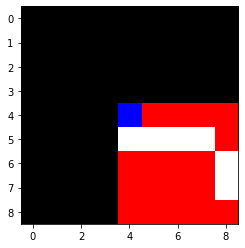

In [7]:
it = representations.ImgTransforms()
SIGHT_DISTANCE = 4

img_trajs = []
for traj in erik_trajs[-1000:]:
    img_traj = []
    for char_grid in traj:
        obs = environment.Observation(
            env_char_grid = char_grid, agent = agents.Agent(SIGHT_DISTANCE))
        obs_img = it.grid_to_rgb(grid = obs).float()
        img_traj.append(obs_img)
    img_trajs.append(img_traj)

print(len(img_trajs))
it.show_rgb(img_trajs[-1][-1])

In [17]:
t = img_trajs[-1]
def mask(trajectory, pct = 0.40):
    rand_vals = np.random.random(size=len(trajectory))
    mask_idxs = np.argwhere(rand_vals < pct).flatten()
    for idx in mask_idxs:
        trajectory[idx] = torch.zeros(trajectory[idx].shape)
    masked_trajectory = trajectory
    return masked_trajectory

mask(t)

[tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 1., 1., 1., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 0., 0., 0., 0.],
          [1., 1., 1., 1., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0.,

In [16]:
torch.zeros?